In [1]:
!pip install streamlit-option-menu

In [2]:
!pip install streamlit_folium

In [3]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

In [4]:
finalists_clean_df = pd.read_csv('Data/finalists_cleaned.csv')

In [5]:
# Display the first few rows to verify
print(finalists_clean_df.head())

   year  final_draw_position      country   style  final_televote_points  \
0  2023                   20       Norway     Pop                  216.0   
1  2023                    5       Serbia     Pop                   16.0   
2  2023                    2     Portugal     Pop                   16.0   
3  2023                   25      Croatia     Pop                  112.0   
4  2023                    3  Switzerland  Ballad                   31.0   

   final_jury_points  final_televote_votes  final_jury_votes  final_place  \
0               52.0                  36.0              11.0          5.0   
1               14.0                   4.0               6.0         24.0   
2               43.0                   3.0               9.0         23.0   
3               11.0                  20.0               2.0         13.0   
4               61.0                  10.0              15.0         20.0   

   final_total_points  
0               268.0  
1                30.0  
2       

In [6]:
finalists_clean_df.shape

(358, 10)

In [7]:
finalists_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   358 non-null    int64  
 1   final_draw_position    358 non-null    int64  
 2   country                358 non-null    object 
 3   style                  358 non-null    object 
 4   final_televote_points  326 non-null    float64
 5   final_jury_points      326 non-null    float64
 6   final_televote_votes   230 non-null    float64
 7   final_jury_votes       230 non-null    float64
 8   final_place            358 non-null    float64
 9   final_total_points     358 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 28.1+ KB


In [8]:
y = finalists_clean_df['final_place']

# Features: drop target and categorical variables
X = finalists_clean_df.drop(columns=['final_place', 'country', 'style'])

# Define numeric feature names (all remaining)
numeric_features = X.columns.tolist()


In [9]:
y.head()

0     5.0
1    24.0
2    23.0
3    13.0
4    20.0
Name: final_place, dtype: float64

In [10]:
# Split the dataset (74/26)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)


In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(264, 7)
(264,)
(94, 7)
(94,)


In [12]:
model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', LinearRegression())
])

In [13]:
# Fit and predict
model.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

In [14]:
reg = model.named_steps['regressor']


In [15]:
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)

feature_names = X_train.columns
coef_table = list(zip(feature_names, reg.coef_))
for name, coef in coef_table:
    print(f"{name:30} {coef:>10.4f}")


Intercept: 172.05007024210224
Coefficients: [-0.07411221 -0.03520973 -0.04090241 -0.0412798  -0.02673216 -0.06374194
  0.00019753]
year                              -0.0741
final_draw_position               -0.0352
final_televote_points             -0.0409
final_jury_points                 -0.0413
final_televote_votes              -0.0267
final_jury_votes                  -0.0637
final_total_points                 0.0002


In [16]:
y_pred = model.predict(X_test)

In [17]:
import sys
import os

# Use the current working directory instead of __file__
current_directory = os.getcwd()

# Add the path to the 'Modules' folder (adjust the path to reach the Modules folder)
sys.path.append(os.path.join(current_directory, 'Modules'))

# Now import the evalute function
from machine_learning.evaluate import evaluate_model

# Assuming you have your model, X_test, and y_test defined somewhere
evaluation_results = evaluate_model(model, X_test, y_test)

# Print the evaluation metrics in a formatted way
print("Model Evaluation Results:")
print("----------------------------")
for metric, value in evaluation_results.items():
    if metric != 'predictions':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"\nPredictions (showing first 10 for brevity):")
        print(", ".join([f"{v:.2f}" for v in value[:10]]))  # Only show the first 10 predictions

Model Evaluation Results:
----------------------------
MAE: 2.9369
MSE: 13.1032
RMSE: 3.6198
R2: 0.7391

Predictions (showing first 10 for brevity):
20.22, 14.06, 15.22, 12.14, 17.95, 13.74, 17.41, 17.16, 13.36, 13.26


C:\Users\jejol\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred

array([20.21881427, 14.05977115, 15.21852679, 12.14026883, 17.95241645,
       13.74474707, 17.41209083, 17.16001443, 13.35813319, 13.2628333 ,
       17.96608502, 13.14687481, 16.51358155, 13.85476216, 18.89357882,
       19.20436442, 20.43341015, 15.29666589, 14.47058997, 13.87115672,
       12.60538878, 13.18208454, 13.81585968, 10.88755428, 16.70214584,
       14.6367594 ,  6.36867299,  7.86584935, 19.85085916, -1.95953919,
       16.54889539, -2.19544883, 14.6575182 , 21.77212515, 11.3844717 ,
       14.82844611,  4.92436399, 14.81404198,  6.54569185, 17.86961434,
       19.59376162, 10.03198107,  6.86676742, 19.52257511, -0.3999382 ,
       13.71023049, 17.68972362,  4.11376304, 19.87283378, 18.0515667 ,
       17.74772421, 16.60120784, 13.13102572, 20.1077098 , 13.52782075,
       17.54080453, 15.56784274, 16.70071174, 16.85284799, 13.46376238,
       17.31615373,  8.63762348, 13.82060066, 14.10038988, 21.49041188,
       18.5469611 ,  6.49208657, 19.73684659, 19.38918964,  7.29

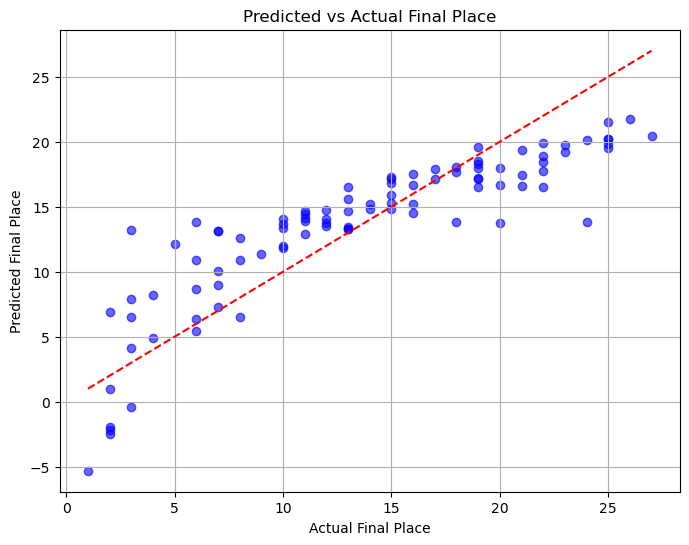

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
plt.xlabel('Actual Final Place')
plt.ylabel('Predicted Final Place')
plt.title('Predicted vs Actual Final Place')
plt.grid(True)
plt.show()

In [20]:
y_test.iloc[0]

25.0

In [21]:
y_pred[0]

20.218814269591377

## Store model

In [23]:
import joblib

In [24]:
# Store the model in a file
model_file = 'Models/finalistfit.pkl'

In [25]:
# save the model
joblib.dump(model, model_file)

['Models/finalistfit.pkl']